# Proyecto IA - Redes neuronales

Ernesto Anaya - 190656 | Héctor G. T. Torres - 191589



In [1]:
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from keras.utils import to_categorical
from keras import models
from keras import layers
from matplotlib import pyplot as plt
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Se dividió el conjunto de prueba en dos: 20% para crear un conjunto de validación, 80% se mantuvo como conjunto de prueba.

In [3]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

validation_images = test_images[8000:]
test_images = test_images[:8000]

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_labels = test_labels[8000:]
test_labels = test_labels[:8000]

## Red Default: 1 capa de 512 neuronas - RMSprop

In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
history = network.fit(train_images, train_labels, 
                      epochs=5, batch_size=128,
                     validation_data=(validation_images,validation_labels))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4248 - accuracy: 0.8742 - val_loss: 0.1010 - val_accuracy: 0.9675
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9683 - val_loss: 0.0754 - val_accuracy: 0.9770
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9789 - val_loss: 0.0588 - val_accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0456 - accuracy: 0.9863 - val_loss: 0.0494 - val_accuracy: 0.9865
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0504 - val_accuracy: 0.9840


In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 957us/step - loss: 0.0686 - accuracy: 0.9804


### Accuracy

In [9]:
print('test_acc:', test_acc)

test_acc: 0.9803749918937683


### Matriz de confusión

In [10]:
test_predictions = network.predict(test_images)

In [11]:
conf = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictions,axis=1))


<AxesSubplot:>

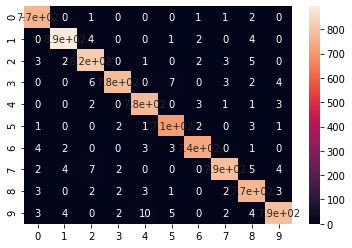

In [12]:
sns.heatmap(conf, annot=True)

## Dígito mejor clasificado (el del índice 1)

In [13]:
y_test = np.argmax(test_labels, axis=1)
y_pred = network.predict_classes(test_images)
print(classification_report(y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.979592  0.993532  0.986513       773
           1   0.986755  0.987845  0.987300       905
           2   0.973810  0.980815  0.977300       834
           3   0.989861  0.972603  0.981156       803
           4   0.977387  0.987310  0.982323       788
           5   0.976712  0.986169  0.981418       723
           6   0.986720  0.982804  0.984758       756
           7   0.985019  0.970480  0.977695       813
           8   0.966165  0.979670  0.972871       787
           9   0.981320  0.963325  0.972239       818

    accuracy                       0.980375      8000
   macro avg   0.980334  0.980455  0.980357      8000
weighted avg   0.980434  0.980375  0.980367      8000



/home/lornarthebreton/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Loss vs. Epoch

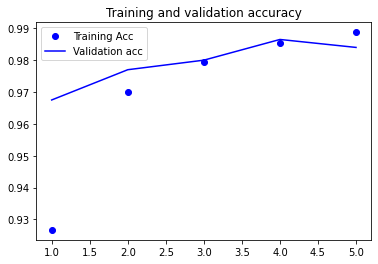

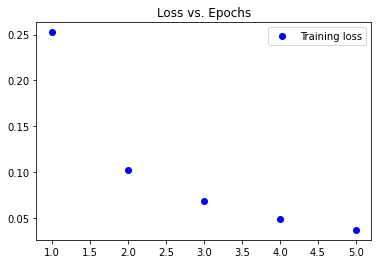

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

## Red A: 2 capas de 128 neuronas - RMSprop

In [15]:
networkA = models.Sequential()
networkA.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkA.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkA.add(layers.Dense(10, activation='softmax'))

In [16]:
networkA.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
historyA=networkA.fit(train_images, train_labels, 
                      epochs=5, batch_size=128,
                     validation_data=(validation_images,validation_labels))

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5237 - accuracy: 0.8508 - val_loss: 0.1146 - val_accuracy: 0.9645
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1394 - accuracy: 0.9586 - val_loss: 0.0921 - val_accuracy: 0.9750
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0918 - accuracy: 0.9722 - val_loss: 0.0881 - val_accuracy: 0.9720
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0665 - accuracy: 0.9789 - val_loss: 0.0618 - val_accuracy: 0.9800
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0643 - val_accuracy: 0.9835


In [18]:
test_lossA, test_accA = networkA.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 677us/step - loss: 0.0841 - accuracy: 0.9756


### Accuracy

In [19]:
print('test_acc:', test_accA)

test_acc: 0.9756249785423279


### Loss vs. Epoch

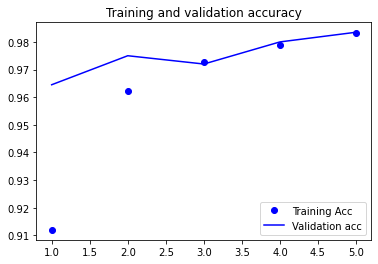

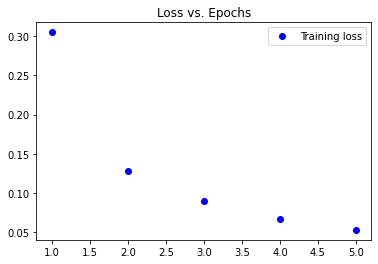

In [20]:
acc = historyA.history['accuracy']
val_acc = historyA.history['val_accuracy']
acc = historyA.history['accuracy']
loss = historyA.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [21]:
test_predictionsA = networkA.predict(test_images)

In [22]:
confA = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsA,axis=1))

<AxesSubplot:>

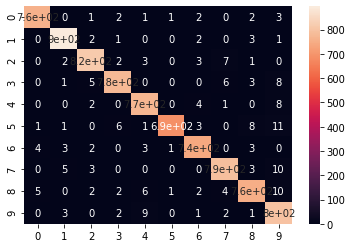

In [23]:
sns.heatmap(confA, annot=True)

## Dígito mejor clasificado (el del índice 1)

In [24]:
y_test = np.argmax(test_labels, axis=1)
y_pred = networkA.predict_classes(test_images)
print(classification_report(y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.987030  0.984476  0.985751       773
           1   0.983535  0.990055  0.986784       905
           2   0.979592  0.978417  0.979004       834
           3   0.981132  0.971357  0.976220       803
           4   0.971106  0.980964  0.976010       788
           5   0.995683  0.957123  0.976023       723
           6   0.977543  0.978836  0.978189       756
           7   0.975369  0.974170  0.974769       813
           8   0.969191  0.959339  0.964240       787
           9   0.940071  0.977995  0.958658       818

    accuracy                       0.975625      8000
   macro avg   0.976025  0.975273  0.975565      8000
weighted avg   0.975843  0.975625  0.975652      8000



/home/lornarthebreton/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Conclusiones

Se puede observar que, tanto en la red neuronal default como en la de dos capas de 128 neuronas hay overfitting, y es peor en la segunda que en la primera. Aunado esto con el hecho de que la test_accuracy de la segunda es menor a la primera, es claro que el mejor modelo entre los dos es el primero. 

Probablemente el hecho de que tenga más capas con menos neuronas por capa hace que la función resultante esté más adaptada al conjunto de entrenamiento que el contraparte default. Por ello, se plantea la hipótesis que la cantidad de capas en la red es inversamente proporcional a la magnitud de su overfitting.

La gráfica de Loss vs. Epoch es similar en ambas redes.

## Red B: 1 capa de 512 neuronas - Adam

In [25]:
networkB = models.Sequential()
networkB.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkB.add(layers.Dense(10, activation='softmax'))

In [26]:
networkB.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [27]:
historyB = networkB.fit(train_images, train_labels, 
                      epochs=5, batch_size=128,
                     validation_data=(validation_images,validation_labels))

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4662 - accuracy: 0.8658 - val_loss: 0.0975 - val_accuracy: 0.9700
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1146 - accuracy: 0.9669 - val_loss: 0.0811 - val_accuracy: 0.9760
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9793 - val_loss: 0.0635 - val_accuracy: 0.9805
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9856 - val_loss: 0.0550 - val_accuracy: 0.9840
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0369 - accuracy: 0.9890 - val_loss: 0.0440 - val_accuracy: 0.9850


In [28]:
test_lossB, test_accB = networkB.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 879us/step - loss: 0.0697 - accuracy: 0.9779


### Accuracy

In [29]:
print('test_acc:', test_accB)

test_acc: 0.9778749942779541


### Loss vs. Epoch

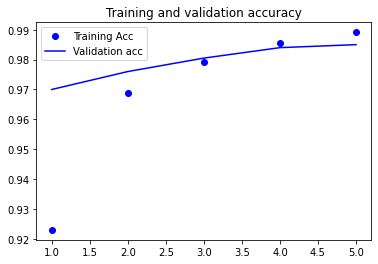

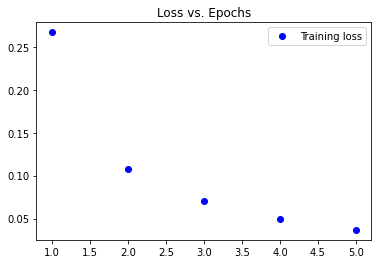

In [30]:
acc = historyB.history['accuracy']
val_acc = historyB.history['val_accuracy']
acc = historyB.history['accuracy']
loss = historyB.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [31]:
test_predictionsB = networkB.predict(test_images)

In [32]:
confB = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsB,axis=1))

<AxesSubplot:>

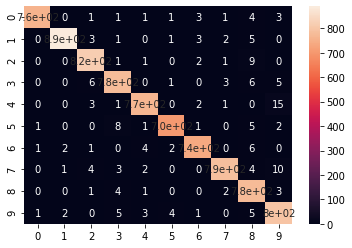

In [33]:
sns.heatmap(confB, annot=True)

## Dígito mejor clasificado (el del índice 1)

In [34]:
y_test = np.argmax(test_labels, axis=1)
y_pred = networkB.predict_classes(test_images)
print(classification_report(y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.996058  0.980595  0.988266       773
           1   0.994413  0.983425  0.988889       905
           2   0.977354  0.983213  0.980275       834
           3   0.970223  0.973848  0.972032       803
           4   0.983312  0.972081  0.977664       788
           5   0.987395  0.975104  0.981211       723
           6   0.984043  0.978836  0.981432       756
           7   0.987484  0.970480  0.978908       813
           8   0.946341  0.986023  0.965775       787
           9   0.954491  0.974328  0.964307       818

    accuracy                       0.977875      8000
   macro avg   0.978111  0.977793  0.977876      8000
weighted avg   0.978143  0.977875  0.977933      8000



/home/lornarthebreton/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Conclusiones

Esta red es la que menos tiene overfitting de todas las probadas hasta este momento.

La gráfica de Loss vs. Epoch se asemeja a las anteriores.

## Red C: 2 capas de 128 neuronas - Adam

In [35]:
networkC = models.Sequential()
networkC.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkC.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkC.add(layers.Dense(10, activation='softmax'))

In [36]:
networkC.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [37]:
historyC = networkC.fit(train_images, train_labels, 
                      epochs=5, batch_size=128,
                     validation_data=(validation_images,validation_labels))

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5670 - accuracy: 0.8409 - val_loss: 0.1161 - val_accuracy: 0.9650
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1376 - accuracy: 0.9596 - val_loss: 0.0817 - val_accuracy: 0.9745
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0903 - accuracy: 0.9733 - val_loss: 0.0702 - val_accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0664 - accuracy: 0.9803 - val_loss: 0.0753 - val_accuracy: 0.9800
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0488 - accuracy: 0.9860 - val_loss: 0.0501 - val_accuracy: 0.9850


In [38]:
test_lossC, test_accC = networkC.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 680us/step - loss: 0.0827 - accuracy: 0.9741


### Accuracy

In [39]:
print('test_acc:', test_accC)

test_acc: 0.9741250276565552


### Matriz de Confusión

### Loss vs. Epoch

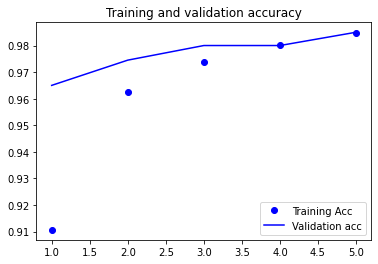

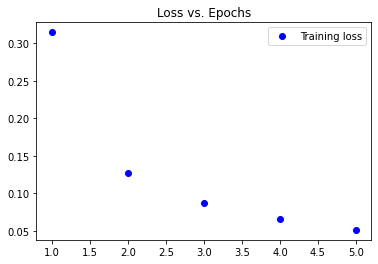

In [40]:
acc = historyC.history['accuracy']
val_acc = historyC.history['val_accuracy']
acc = historyC.history['accuracy']
loss = historyC.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

In [41]:
test_predictionsC = networkC.predict(test_images)

In [42]:
confC = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsC,axis=1))

<AxesSubplot:>

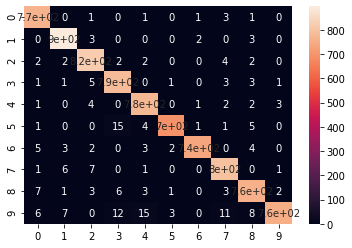

In [43]:
sns.heatmap(confC, annot=True)

## Dígito mejor clasificado (el del índice 1)

In [44]:
y_test = np.argmax(test_labels, axis=1)
y_pred = networkC.predict_classes(test_images)
print(classification_report(y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.969620  0.990944  0.980166       773
           1   0.978190  0.991160  0.984632       905
           2   0.970414  0.983213  0.976772       834
           3   0.957473  0.981320  0.969250       803
           4   0.963930  0.983503  0.973618       788
           5   0.990043  0.962656  0.976157       723
           6   0.993261  0.974868  0.983979       756
           7   0.967233  0.980320  0.973732       813
           8   0.964512  0.966963  0.965736       787
           9   0.990826  0.924205  0.956357       818

    accuracy                       0.974125      8000
   macro avg   0.974550  0.973915  0.974040      8000
weighted avg   0.974396  0.974125  0.974067      8000



/home/lornarthebreton/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Conclusiones

Tiene un overfitting mayor que la Red B y la gráfica Loss vs. Epoch sigue siendo similar a las anteriores. Otra vez, más evidencia que refuerza la hipótesis planteada.

## Red D: 1 capa, 512 neuronas - SGD

In [45]:
networkD = models.Sequential()
networkD.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkD.add(layers.Dense(10, activation='softmax'))

In [46]:
networkD.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [47]:
historyD = networkD.fit(train_images, train_labels, 
                      epochs=5, batch_size=128,
                     validation_data=(validation_images,validation_labels))

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.5632 - accuracy: 0.6031 - val_loss: 0.4810 - val_accuracy: 0.9195
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5632 - accuracy: 0.8690 - val_loss: 0.3228 - val_accuracy: 0.9300
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.8856 - val_loss: 0.2677 - val_accuracy: 0.9350
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3774 - accuracy: 0.8972 - val_loss: 0.2404 - val_accuracy: 0.9370
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.9046 - val_loss: 0.2226 - val_accuracy: 0.9405


In [48]:
test_lossD, test_accD = networkD.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 872us/step - loss: 0.3397 - accuracy: 0.9094


### Accuracy

In [49]:
print('test_acc:', test_accD)

test_acc: 0.909375011920929


### Loss vs. Epoch

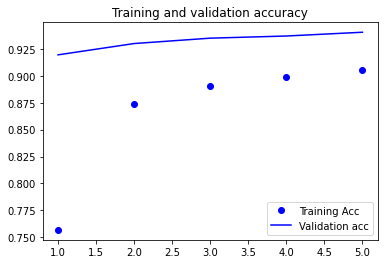

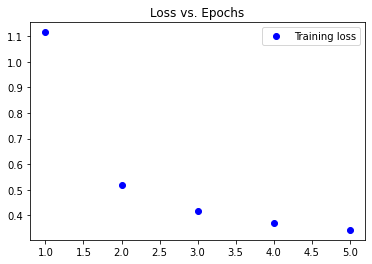

In [50]:
acc = historyD.history['accuracy']
val_acc = historyD.history['val_accuracy']
acc = historyD.history['accuracy']
loss = historyD.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [51]:
test_predictionsD = networkD.predict(test_images)

In [52]:
confD = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsD,axis=1))

<AxesSubplot:>

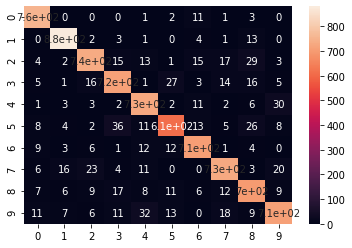

In [53]:
sns.heatmap(confD, annot=True)

## Dígito mejor clasificado (el del índice 1)

In [54]:
y_test = np.argmax(test_labels, axis=1)
y_pred = networkD.predict_classes(test_images)
print(classification_report(y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.936725  0.976714  0.956301       773
           1   0.954496  0.973481  0.963895       905
           2   0.916459  0.881295  0.898533       834
           3   0.889303  0.890411  0.889857       803
           4   0.889976  0.923858  0.906600       788
           5   0.899705  0.843707  0.870807       723
           6   0.918288  0.936508  0.927308       756
           7   0.911361  0.897909  0.904585       813
           8   0.865598  0.891995  0.878598       787
           9   0.904580  0.869193  0.886534       818

    accuracy                       0.909375      8000
   macro avg   0.908649  0.908507  0.908302      8000
weighted avg   0.909308  0.909375  0.909073      8000



/home/lornarthebreton/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Conclusiones

La primera red sin overfitting (a pesar de tener la menor accuracy hasta el momento). 

La gráfica Loss vs. Epochs cambia radicalmente: incrementa la magnitud de la disminución de la pérdida entre cada época en comparación con las otras redes. En otras palabras, esta red "aprende más rápido".

## Red E: 2 capas de 128 neuronas - SGD

In [55]:
networkE = models.Sequential()
networkE.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkE.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
networkE.add(layers.Dense(10, activation='softmax'))

In [56]:
networkE.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [57]:
historyE = networkE.fit(train_images, train_labels, 
                      epochs=5, batch_size=128,
                     validation_data=(validation_images,validation_labels))

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 1.7448 - accuracy: 0.4965 - val_loss: 0.5048 - val_accuracy: 0.8945
Epoch 2/5
469/469 [==============================] - 0s 947us/step - loss: 0.5564 - accuracy: 0.8588 - val_loss: 0.3091 - val_accuracy: 0.9235
Epoch 3/5
469/469 [==============================] - 0s 950us/step - loss: 0.4141 - accuracy: 0.8857 - val_loss: 0.2525 - val_accuracy: 0.9340
Epoch 4/5
469/469 [==============================] - 0s 942us/step - loss: 0.3491 - accuracy: 0.9020 - val_loss: 0.2215 - val_accuracy: 0.9390
Epoch 5/5
469/469 [==============================] - 0s 944us/step - loss: 0.3144 - accuracy: 0.9122 - val_loss: 0.2121 - val_accuracy: 0.9410


In [58]:
test_lossE, test_accE = networkE.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 685us/step - loss: 0.3113 - accuracy: 0.9133


### Accuracy

In [59]:
print('test_acc:', test_accE)

test_acc: 0.9132500290870667


### Loss vs. Epoch

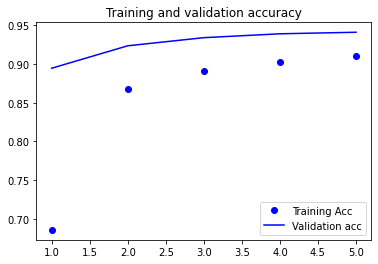

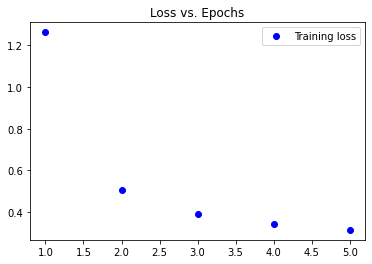

In [60]:
acc = historyE.history['accuracy']
val_acc = historyE.history['val_accuracy']
acc = historyE.history['accuracy']
loss = historyE.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [61]:
test_predictionsE = networkE.predict(test_images)

In [62]:
confE = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsE,axis=1))

<AxesSubplot:>

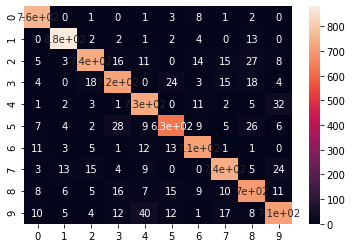

In [63]:
sns.heatmap(confE, annot=True)

## Dígito mejor clasificado (el del índice 1)

In [64]:
y_test = np.argmax(test_labels, axis=1)
y_pred = networkE.predict_classes(test_images)
print(classification_report(y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.939206  0.979301  0.958835       773
           1   0.960742  0.973481  0.967069       905
           2   0.930380  0.881295  0.905172       834
           3   0.899624  0.892902  0.896250       803
           4   0.890378  0.927665  0.908639       788
           5   0.900862  0.867220  0.883721       723
           6   0.923177  0.937831  0.930446       756
           7   0.918114  0.910209  0.914145       813
           8   0.869565  0.889454  0.879397       787
           9   0.892947  0.866748  0.879653       818

    accuracy                       0.913250      8000
   macro avg   0.912499  0.912611  0.912333      8000
weighted avg   0.913235  0.913250  0.913022      8000



/home/lornarthebreton/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Conclusiones

Al igual que la Red E, tampoco tiene overfitting (a pesar de tener varias capas). Tiene mayor accuracy que la Red E, pero sigue siendo la segunda menor.

Dicho esto, es el modelo con la mayor disminución en la pérdida entre épocas, como se ve en la gráfica: vence a su contraparte de 1 capa.

## 2 capas de 512 neuronas - Adam

In [65]:
networkF = models.Sequential()
networkF.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkF.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkF.add(layers.Dense(10, activation='softmax'))

In [66]:
networkF.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [67]:
historyF = networkF.fit(train_images, train_labels, 
                      epochs=5, batch_size=128,
                     validation_data=(validation_images,validation_labels))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4050 - accuracy: 0.8765 - val_loss: 0.0834 - val_accuracy: 0.9765
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9739 - val_loss: 0.0506 - val_accuracy: 0.9850
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0476 - accuracy: 0.9844 - val_loss: 0.0448 - val_accuracy: 0.9870
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0535 - val_accuracy: 0.9835
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0240 - accuracy: 0.9917 - val_loss: 0.0502 - val_accuracy: 0.9845


In [68]:
test_lossF, test_accF = networkC.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 757us/step - loss: 0.0827 - accuracy: 0.9741


### Accuracy

In [69]:
print('test_acc:', test_accF)

test_acc: 0.9741250276565552


### Loss vs. Epoch

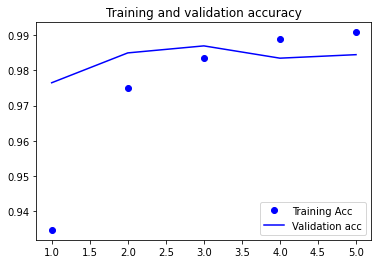

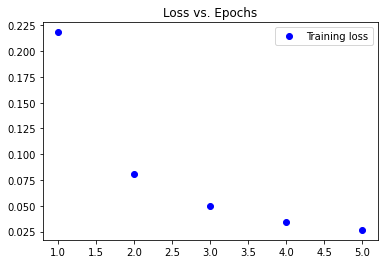

In [70]:
acc = historyF.history['accuracy']
val_acc = historyF.history['val_accuracy']
acc = historyF.history['accuracy']
loss = historyF.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [71]:
test_predictionsF = networkF.predict(test_images)

In [72]:
confF = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsF,axis=1))

<AxesSubplot:>

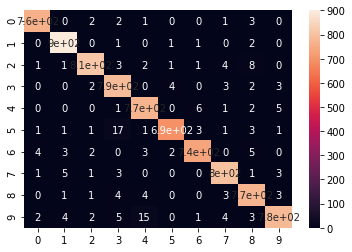

In [73]:
sns.heatmap(confF, annot=True)

## Dígito mejor clasificado (el del índice 1)

In [74]:
y_test = np.argmax(test_labels, axis=1)
y_pred = networkF.predict_classes(test_images)
print(classification_report(y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.988357  0.988357  0.988357       773
           1   0.983607  0.994475  0.989011       905
           2   0.986650  0.974820  0.980700       834
           3   0.956364  0.982565  0.969287       803
           4   0.967459  0.980964  0.974165       788
           5   0.988604  0.959889  0.974035       723
           6   0.983979  0.974868  0.979402       756
           7   0.979167  0.982780  0.980970       813
           8   0.963750  0.979670  0.971645       787
           9   0.981179  0.955990  0.968421       818

    accuracy                       0.977750      8000
   macro avg   0.977912  0.977438  0.977599      8000
weighted avg   0.977892  0.977750  0.977747      8000



/home/lornarthebreton/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Conclusiones

Es la red con el peor overfitting de todas: una diferencia de más de 2% entre la accuracy del conjunto de prueba y el conjunto de entrenamiento. Más evidencia que refuerza la hipótesis.

La gráfica Epoch vs. Loss indica que no había mucha pérdida desde la primera época, entonces, el impacto de las siguientes épocas fue mínimo.

## Red G: 2 capas de 512 neuronas - SGD

In [75]:
networkG = models.Sequential()
networkG.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkG.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkG.add(layers.Dense(10, activation='softmax'))

In [76]:
networkG.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [77]:
historyG = networkG.fit(train_images, train_labels, 
                      epochs=5, batch_size=128,
                     validation_data=(validation_images,validation_labels))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.5938 - accuracy: 0.5917 - val_loss: 0.4079 - val_accuracy: 0.9160
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4910 - accuracy: 0.8733 - val_loss: 0.2651 - val_accuracy: 0.9385
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3738 - accuracy: 0.8965 - val_loss: 0.2223 - val_accuracy: 0.9420
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.9081 - val_loss: 0.1999 - val_accuracy: 0.9465
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2965 - accuracy: 0.9159 - val_loss: 0.1855 - val_accuracy: 0.9515


In [78]:
test_lossG, test_accG = networkG.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 1ms/step - loss: 0.2901 - accuracy: 0.9197


### Accuracy

In [79]:
print('test_acc:', test_accG)

test_acc: 0.9197499752044678


### Loss vs. Epoch

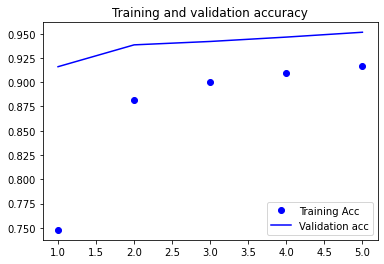

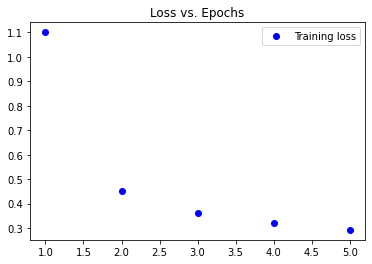

In [80]:
acc = historyG.history['accuracy']
val_acc = historyG.history['val_accuracy']
acc = historyG.history['accuracy']
loss = historyG.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [81]:
test_predictionsG = networkG.predict(test_images)

In [82]:
confG = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsG,axis=1))

<AxesSubplot:>

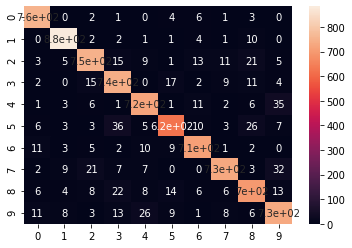

In [83]:
sns.heatmap(confG, annot=True)

## Dígito mejor clasificado (el del índice 1)

In [84]:
y_test = np.argmax(test_labels, axis=1)
y_pred = networkG.predict_classes(test_images)
print(classification_report(y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.947368  0.978008  0.962444       773
           1   0.961915  0.976796  0.969298       905
           2   0.920343  0.900480  0.910303       834
           3   0.882423  0.925280  0.903343       803
           4   0.916244  0.916244  0.916244       788
           5   0.917647  0.863071  0.889522       723
           6   0.930809  0.943122  0.936925       756
           7   0.945736  0.900369  0.922495       813
           8   0.888325  0.889454  0.888889       787
           9   0.884198  0.896088  0.890103       818

    accuracy                       0.919750      8000
   macro avg   0.919501  0.918891  0.918957      8000
weighted avg   0.919928  0.919750  0.919606      8000



/home/lornarthebreton/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Conclusiones

El optimizador SGD sigue sin dar overfitting en sus resultados y, de hecho, aumentó su accuracy con la adición de neuronas a sus capas. Hasta ahora, es el único modelo que no cumple con la hipótesis planteada.

Igualmente, como lo demuestra la gráfica Epochs vs. Loss, sigue la tendencia de las demás redes SGD de disminuir su pérdida en mayor magnitud mientras más capas tiene (aunque no tanto como su contraparte de 128 neuronas).

## Red H: 2 capas de 512 neuronas - RMSProp

In [85]:
networkH = models.Sequential()
networkH.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkH.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
networkH.add(layers.Dense(10, activation='softmax'))

In [86]:
networkH.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [87]:
historyH = networkH.fit(train_images, train_labels, 
                      epochs=5, batch_size=128,
                     validation_data=(validation_images,validation_labels))

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3970 - accuracy: 0.8763 - val_loss: 0.1138 - val_accuracy: 0.9610
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0841 - accuracy: 0.9746 - val_loss: 0.0547 - val_accuracy: 0.9825
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.0621 - val_accuracy: 0.9815
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0667 - val_accuracy: 0.9835
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0495 - val_accuracy: 0.9885


In [88]:
test_lossh, test_accH = networkH.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.9796


### Accuracy

In [89]:
print('test_acc:', test_accH)

test_acc: 0.9796249866485596


### Loss vs. Epoch

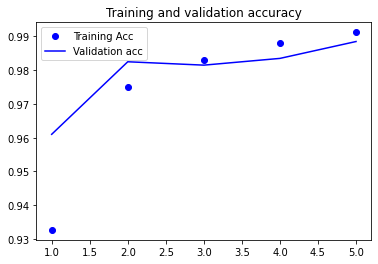

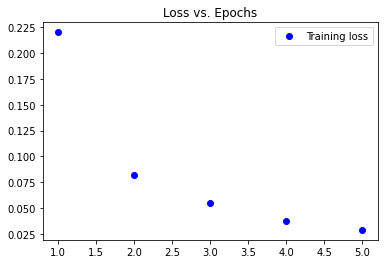

In [90]:
acc = historyH.history['accuracy']
val_acc = historyH.history['val_accuracy']
acc = historyH.history['accuracy']
loss = historyH.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()

### Matriz de Confusión

In [91]:
test_predictionsH = networkH.predict(test_images)

In [92]:
confH = confusion_matrix(np.argmax(test_labels,axis=1), 
                             np.argmax(test_predictionsH,axis=1))

<AxesSubplot:>

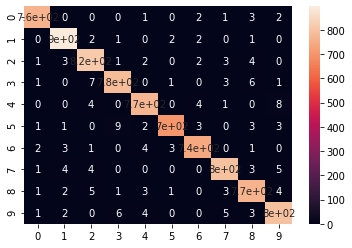

In [93]:
sns.heatmap(confH, annot=True)

## Dígito mejor clasificado (el del índice 1)

In [94]:
y_test = np.argmax(test_labels, axis=1)
y_pred = networkH.predict_classes(test_images)
print(classification_report(y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.989637  0.988357  0.988997       773
           1   0.983553  0.991160  0.987342       905
           2   0.972652  0.980815  0.976716       834
           3   0.977556  0.976339  0.976947       803
           4   0.979670  0.978426  0.979048       788
           5   0.990113  0.969571  0.979734       723
           6   0.982781  0.981481  0.982131       756
           7   0.980296  0.979090  0.979692       813
           8   0.969659  0.974587  0.972117       787
           9   0.971951  0.974328  0.973138       818

    accuracy                       0.979625      8000
   macro avg   0.979787  0.979415  0.979586      8000
weighted avg   0.979656  0.979625  0.979626      8000



/home/lornarthebreton/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Conclusiones

Al igual que los otros modelos que utilizan el optimizados RMSdrop, aún tiene overfitting y no muestra una mejora significativa en la dismunición de la pérdida entre épocas.

## Tablas ROC

In [95]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [96]:
fpr=dict()
tpr=dict()
roc_auc = dict()
fprA=dict()
tprA=dict()
roc_aucA = dict()
fprB=dict()
tprB=dict()
roc_aucB = dict()
fprC=dict()
tprC=dict()
roc_aucC = dict()
fprD=dict()
tprD=dict()
roc_aucD = dict()
fprE=dict()
tprE=dict()
roc_aucE = dict()
fprF=dict()
tprF=dict()
roc_aucF = dict()
fprG=dict()
tprG=dict()
roc_aucG = dict()
fprH=dict()
tprH=dict()
roc_aucH = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    fprA[i], tprA[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsA[:, i])
    roc_aucA[i] = auc(fprA[i], tprA[i])
    
    fprB[i], tprB[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsB[:, i])
    roc_aucB[i] = auc(fprB[i], tprB[i])
    
    fprC[i], tprC[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsC[:, i])
    roc_aucC[i] = auc(fprC[i], tprC[i])
    
    fprD[i], tprD[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsD[:, i])
    roc_aucD[i] = auc(fprD[i], tprD[i])
    
    fprE[i], tprE[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsE[:, i])
    roc_aucE[i] = auc(fprE[i], tprE[i])
    
    fprF[i], tprF[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsF[:, i])
    roc_aucF[i] = auc(fprF[i], tprF[i])
    
    fprG[i], tprG[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsG[:, i])
    roc_aucG[i] = auc(fprG[i], tprG[i])
    
    fprH[i], tprH[i], _ = roc_curve(test_labels[:, i], 
                                  test_predictionsH[:, i])
    roc_aucH[i] = auc(fprH[i], tprH[i])

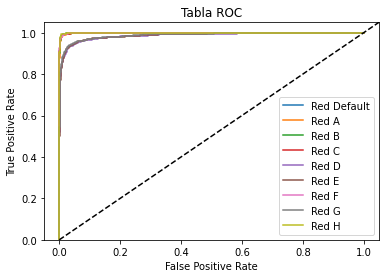

In [97]:
plt.plot(fpr[i], tpr[i], label='Red Default'% roc_auc[2])
plt.plot(fprA[i], tprA[i], label='Red A'% roc_aucA[2])
plt.plot(fprB[i], tprB[i], label='Red B'% roc_aucB[2])
plt.plot(fprC[i], tprC[i], label='Red C'% roc_aucC[2])
plt.plot(fprD[i], tprD[i], label='Red D'% roc_aucD[2])
plt.plot(fprE[i], tprE[i], label='Red E'% roc_aucE[2])
plt.plot(fprF[i], tprF[i], label='Red F'% roc_aucF[2])
plt.plot(fprG[i], tprG[i], label='Red G'% roc_aucG[2])
plt.plot(fprH[i], tprH[i], label='Red H'% roc_aucH[2])
plt.plot([0, 10], [0, 10], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tabla ROC')
plt.legend(loc="lower right")


plt.show()

### Acercamiento

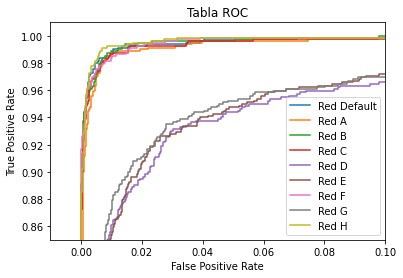

In [98]:
plt.plot(fpr[i], tpr[i], label='Red Default'% roc_auc[2])
plt.plot(fprA[i], tprA[i], label='Red A'% roc_aucA[2])
plt.plot(fprB[i], tprB[i], label='Red B'% roc_aucB[2])
plt.plot(fprC[i], tprC[i], label='Red C'% roc_aucC[2])
plt.plot(fprD[i], tprD[i], label='Red D'% roc_aucD[2])
plt.plot(fprE[i], tprE[i], label='Red E'% roc_aucE[2])
plt.plot(fprF[i], tprF[i], label='Red F'% roc_aucF[2])
plt.plot(fprG[i], tprG[i], label='Red G'% roc_aucG[2])
plt.plot(fprH[i], tprH[i], label='Red H'% roc_aucH[2])
plt.plot([0, 10], [0, 10], 'k--')
plt.xlim([-0.01, 0.1])
plt.ylim([0.85, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tabla ROC')
plt.legend(loc="lower right")

plt.show()

## Conclusiones

Como se puede ver en la tabla ROC, la mejor clasificadora es la Red B (la de 512 neuronas, con Adam como optimizador). Dicho esto, las redes A, C, F, y H se le acercan. Las peores clasificadoras fueron las redes G, D y E (es decir, todas la redes que utilizan el optimizador SGD).

Dicho esto, la mejor de las redes que utilizaban SGD fue la red G, la que tenía más neuronas y más capas por neuronas de las tres peores. Esto, aunado con el hecho de que las redes con el optimizador SGD eran las únicas sin overfitting y a las que no se les aplicaba la hipótesis mencionada anteriormente, lleva a considerar la posibilidad de que una red que utilice el optimizador SGD, pero que tenga más de dos capas, alcanzaría la acccuracy de las redes que utilizan Adam y RMSdrop, pero sin tener overfitting. 

Esta hipótesis es reforzada por el hecho de que las redes SGD son las que tienen la disminución de mayor magnitud en la pérdida entre cada época.

Cabría probar esta última hipótesis en una computadora que no emita ruidos preocupantes cuando se ejecuta este notebook.